# CUSTOMER CHURN CLASSIFICATION PROJECT


## BUSINESS UNDERSTANDING

### Customer attrition is one of the biggest expenditures of any organization. Customer churn otherwise known as customer attrition or customer turnover is the percentage of customers that stopped using your company's product or service within a specified timeframe.¶

### For instance, if you began the year with 500 customers but later ended with 480 customers, the percentage of customers that left would be 4%. If we could figure out why a customer leaves and when they leave with reasonable accuracy, it would immensely help the organization to strategize their retention initiatives manifold.


# PROJECT EXPECTATION

### In this project, we aim to find the likelihood of a customer leaving the organization, the key indicators of churn as well as the retention strategies that can be implemented to avert this problem.

## Our analysis or methods comprises the following steps:¶

### 1) Hypothesis formation and Data Processing - Importing the relevant libraries and modules, Cleaning of Data, Check data types, Encoding Data labels etc.

### 2)Data Evaluation -- Perform bivariate and multivariate analysis, EDA

### 3)Build & Select Model -- Train Model on dataset and select the best performing model.

### 4)Evaluate your chosen Model.

### 5)Model Improvement.

### 6)Future Predictions.

### 7)Key Insights and Conclusion.


# HYPOTHESIS STATEMENT

### H0: CHURN RATE IS NOT DEPENDENT ON THE GENDER¶

### H1: CHURN RATE IS DEPENDENT ON THE GENDER


# ANALYTICAL QUESTIONS

### 1) What is the total annual charges

### 2) What is the total charges of males and females respectively.¶

### 3) Which services has the highest churn rate

### 4) Which Services has the highest charge

### 5) Which Gender churn the most.

## IMPORTING LIBRARIES

In [1]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm # sklearn modules for data preprocessing:from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler #sklearn modules for Model Selection:from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process

from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier #sklearn modules for Model Evaluation & Improvement:
    
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score #Standard 
from sklearn.impute import SimpleImputer

In [2]:
# loading all the Datasets

# Train Datasets
data1 = pd.read_csv(r'SQL_DATASET.csv')

data2 = pd.read_csv(r'LP2_Telco-churn-last-2000.csv')

# Test Dataset
data3 = pd.read_excel(r'Telco-churn-second-2000.xlsx')

In [3]:
data1

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,7590-VHVEG,Female,False,True,False,1,False,NaN,DSL,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,3,7795-CFOCW,Male,False,False,False,45,False,NaN,DSL,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2995,2209-XADXF,Female,False,False,False,1,False,NaN,DSL,...,False,False,False,False,Month-to-month,False,Bank transfer (automatic),25.250000,25.250000,False
2996,2996,6620-JDYNW,Female,False,False,False,18,True,True,DSL,...,True,False,False,False,Month-to-month,True,Mailed check,60.599998,1156.349976,False
2997,2997,1891-FZYSA,Male,True,True,False,69,True,True,Fiber optic,...,False,False,True,False,Month-to-month,True,Electronic check,89.949997,6143.149902,True
2998,2998,4770-UEZOX,Male,False,False,False,2,True,False,Fiber optic,...,False,False,False,False,Month-to-month,True,Electronic check,74.750000,144.800003,False


In [4]:
# delecting the Unamed column

del data1['Unnamed: 0']

In [5]:
data1

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,NaN,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,NaN,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2209-XADXF,Female,False,False,False,1,False,NaN,DSL,False,...,False,False,False,False,Month-to-month,False,Bank transfer (automatic),25.250000,25.250000,False
2996,6620-JDYNW,Female,False,False,False,18,True,True,DSL,True,...,True,False,False,False,Month-to-month,True,Mailed check,60.599998,1156.349976,False
2997,1891-FZYSA,Male,True,True,False,69,True,True,Fiber optic,False,...,False,False,True,False,Month-to-month,True,Electronic check,89.949997,6143.149902,True
2998,4770-UEZOX,Male,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,74.750000,144.800003,False


In [6]:
data2

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
2039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
2040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
2041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [7]:
data3

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55,Yes
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8,No
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55,No
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,...,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55,Yes
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,7912-SYRQT,Female,0,No,No,7,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),75.10,552.95,Yes
1996,3557-HTYWR,Female,0,No,No,47,Yes,Yes,DSL,Yes,...,No,Yes,No,Yes,Two year,No,Mailed check,74.05,3496.3,No
1997,4816-JBHOV,Male,1,No,No,2,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,44.70,93.7,Yes
1998,8920-NAVAY,Male,1,No,No,62,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),110.75,7053.35,No


# MERGING THE TRAIN DATASETS BY CONCATINATING DATA1 AND DATA2

In [8]:
# concatenating data1, data2 to get the train data

train_df = pd.concat([data1, data2], ignore_index=True)

In [9]:
train_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,NaN,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,NaN,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.800000,1990.5,No
5039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.200000,7362.9,No
5040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.600000,346.45,No
5041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.400000,306.6,Yes


In [10]:
# Test data

test_df = data3

test_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55,Yes
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8,No
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55,No
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,...,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55,Yes
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,7912-SYRQT,Female,0,No,No,7,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),75.10,552.95,Yes
1996,3557-HTYWR,Female,0,No,No,47,Yes,Yes,DSL,Yes,...,No,Yes,No,Yes,Two year,No,Mailed check,74.05,3496.3,No
1997,4816-JBHOV,Male,1,No,No,2,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,44.70,93.7,Yes
1998,8920-NAVAY,Male,1,No,No,62,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),110.75,7053.35,No


# EXPLORATORY DATA ANALYSIS (EDA)

In [11]:
train_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,NaN,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,NaN,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   object 
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


In [13]:
train_df.shape

(5043, 21)

In [14]:
train_df.isna().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

In [15]:
train_df.describe()

,tenure,MonthlyCharges
count,5043.000000,5043.000000
mean,32.576641,65.090214
std,24.529807,30.068133
min,0.000000,18.400000
25%,9.000000,35.775000
50%,29.000000,70.550003
75%,56.000000,90.050003
max,72.000000,118.650002


In [16]:
train_df.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [17]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2000 non-null   object 
 1   gender            2000 non-null   object 
 2   SeniorCitizen     2000 non-null   int64  
 3   Partner           2000 non-null   object 
 4   Dependents        2000 non-null   object 
 5   tenure            2000 non-null   int64  
 6   PhoneService      2000 non-null   object 
 7   MultipleLines     2000 non-null   object 
 8   InternetService   2000 non-null   object 
 9   OnlineSecurity    2000 non-null   object 
 10  OnlineBackup      2000 non-null   object 
 11  DeviceProtection  2000 non-null   object 
 12  TechSupport       2000 non-null   object 
 13  StreamingTV       2000 non-null   object 
 14  StreamingMovies   2000 non-null   object 
 15  Contract          2000 non-null   object 
 16  PaperlessBilling  2000 non-null   object 


In [18]:
test_df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [19]:
test_df.shape

(2000, 21)

In [20]:
test_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55,Yes
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8,No
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55,No
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,...,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55,Yes
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15,Yes


In [21]:
test_df.shape

(2000, 21)

In [22]:
# Drpping the Churn Columnin the test dataset

test_df = test_df.drop('Churn', axis=1)

In [23]:
test_df.shape

(2000, 20)

In [24]:
test_df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [25]:
# IN OUR TRAIN DATASET, LET CONVERT ALL THE TRUE TO YES AND FALSE TO NO.

train_df = train_df.replace({True:'Yes',False:'No','No Internet Service':'No','Yes':'Yes','No':'No','No phone service':'No'}, inplace = False)

# Converting 'TotalCharges' Column to Numeric

train_df['TotalCharges'] = pd.to_numeric(train_df['TotalCharges'], errors = 'coerce')

train_df


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,NaN,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,7795-CFOCW,Male,No,No,No,45,No,NaN,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,6840-RESVB,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.800000,1990.500000,No
5039,2234-XADUH,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.200000,7362.900000,No
5040,4801-JZAZL,Female,No,Yes,Yes,11,No,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.600000,346.450000,No
5041,8361-LTMKD,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.400000,306.600000,Yes


In [26]:
# lets split our dataset into numeric and categorical datas

num_col = train_df.select_dtypes(exclude='object')

cat_col = train_df.select_dtypes(include='object')


In [27]:
train_df.corr()

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.240645,0.826264
MonthlyCharges,0.240645,1.000000,0.647007
TotalCharges,0.826264,0.647007,1.000000


<AxesSubplot:>

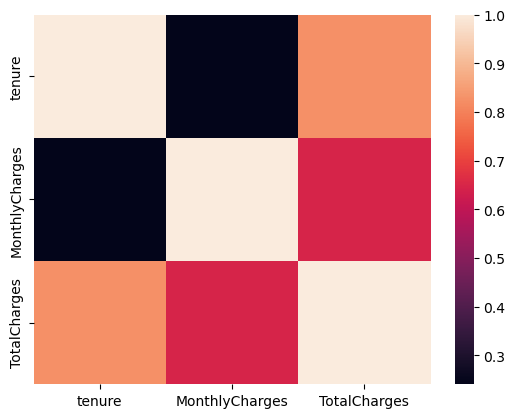

In [28]:
sns.heatmap(train_df.corr())

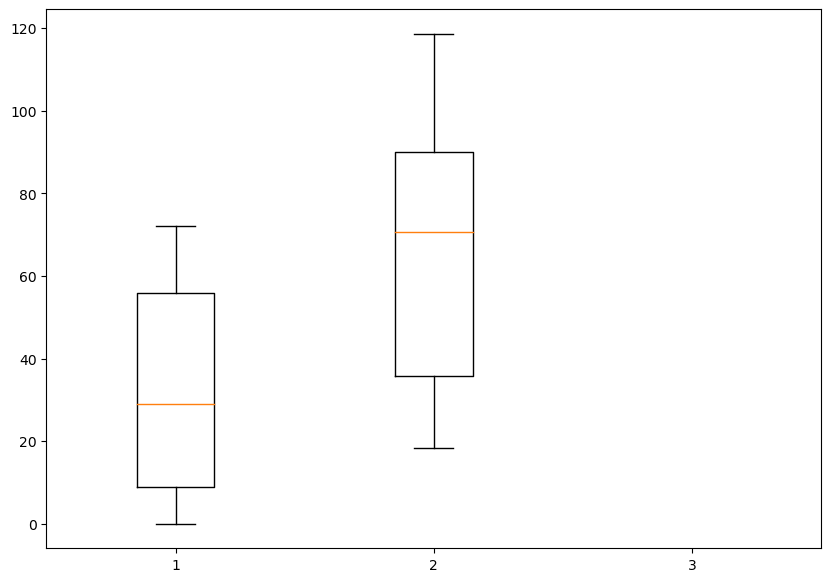

In [29]:
fig=plt.figure(figsize=(10,7))

plt.boxplot(num_col)

plt.show()



# UNIVARIATE ANALYSIS

### It is the simplest method of analyzing data where we examin each variable individually. 

### For Categorical features, we use frequency table or bar plots which will calculate the number of each category in a particular variable.

### For numerical features, probability density plots can be used to look at the distribution of the variable.




## Target Variable
#### We first look at the target variable which is the Churn Column. As it is a categorical variable. 

### let us look at its frequency table, percentage distribution and barplot.

In [30]:
train_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,NaN,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,7795-CFOCW,Male,No,No,No,45,No,NaN,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,6840-RESVB,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.800000,1990.500000,No
5039,2234-XADUH,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.200000,7362.900000,No
5040,4801-JZAZL,Female,No,Yes,Yes,11,No,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.600000,346.450000,No
5041,8361-LTMKD,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.400000,306.600000,Yes


In [31]:
# Frequency table of a variable will give us the count of category in that variable.

train_df['Churn'].value_counts()

No     3706
Yes    1336
Name: Churn, dtype: int64

In [32]:
# Sum of counts

train_df['Churn'].value_counts().sum()

5042

In [33]:
#Normalize can be set to True to print proportions instead of number

train_df['Churn'].value_counts(normalize = True)

No     0.735026
Yes    0.264974
Name: Churn, dtype: float64

<AxesSubplot:>

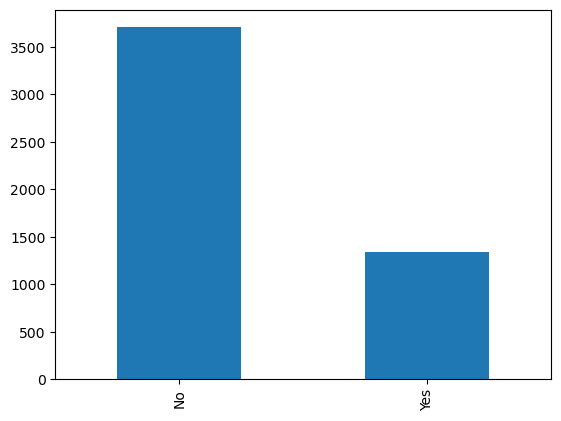

In [34]:
train_df['Churn'].value_counts().plot.bar()

In [35]:
train_df['Churn'].value_counts()

No     3706
Yes    1336
Name: Churn, dtype: int64

In [36]:
train_df['Churn'].value_counts(normalize = True)

No     0.735026
Yes    0.264974
Name: Churn, dtype: float64

<AxesSubplot:>

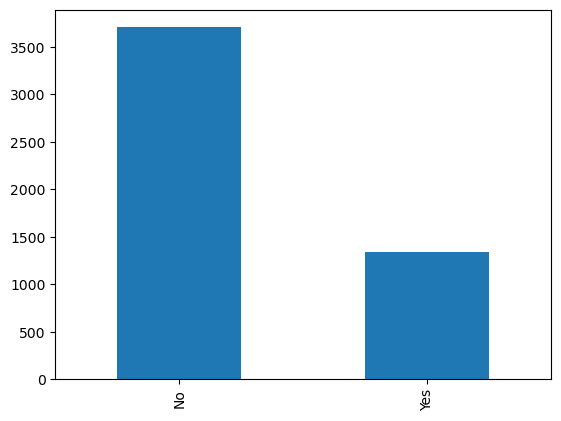

In [37]:
train_df['Churn'].value_counts().plot.bar()

From the graph, a total of 3706 which is about 74% of the total number 5,042 where No that is did not churn, while a total of 1,336 which is about 27% of the total number 5,042 where yes that is people that churn (left).

### Now let Visualize some variables

In [38]:
train_df['gender'].value_counts()

Male      2559
Female    2484
Name: gender, dtype: int64

In [39]:
train_df['gender'].value_counts(normalize = True)

Male      0.507436
Female    0.492564
Name: gender, dtype: float64

<AxesSubplot:>

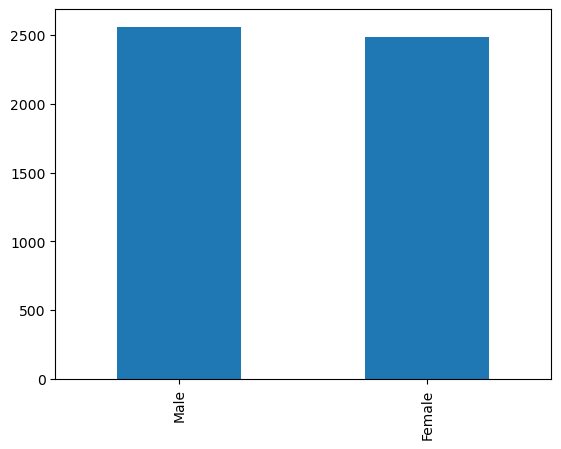

In [40]:
train_df['gender'].value_counts().plot.bar()

From the above graph, about 51% are Male while about 49% are Female in the entire dataset.

In [41]:
train_df['SeniorCitizen'].value_counts()

No     4224
Yes     819
Name: SeniorCitizen, dtype: int64

In [42]:
train_df['SeniorCitizen'].value_counts(normalize = True)

No     0.837597
Yes    0.162403
Name: SeniorCitizen, dtype: float64

<AxesSubplot:title={'center':'SeniorCitizen'}>

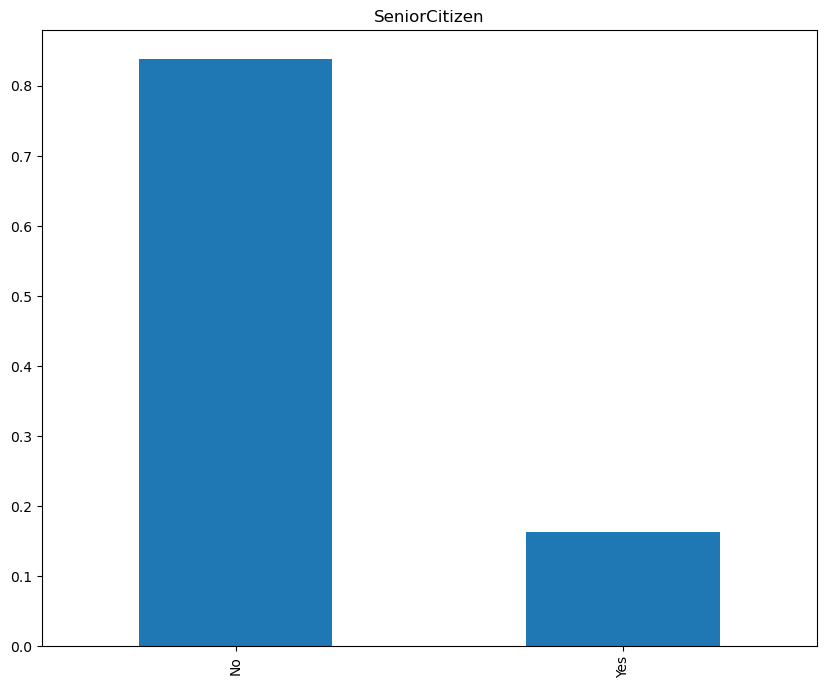

In [43]:
train_df['SeniorCitizen'].value_counts(normalize = True).plot.bar(figsize =(10,8), title = 'SeniorCitizen')

From the above graph, about 84% of the Senior Citizen did not Churn while about 16% churned.

In [44]:
train_df['Partner'].value_counts()

No     2585
Yes    2458
Name: Partner, dtype: int64

In [45]:
train_df['Partner'].value_counts(normalize = True)

No     0.512592
Yes    0.487408
Name: Partner, dtype: float64

<AxesSubplot:title={'center':'Partner'}>

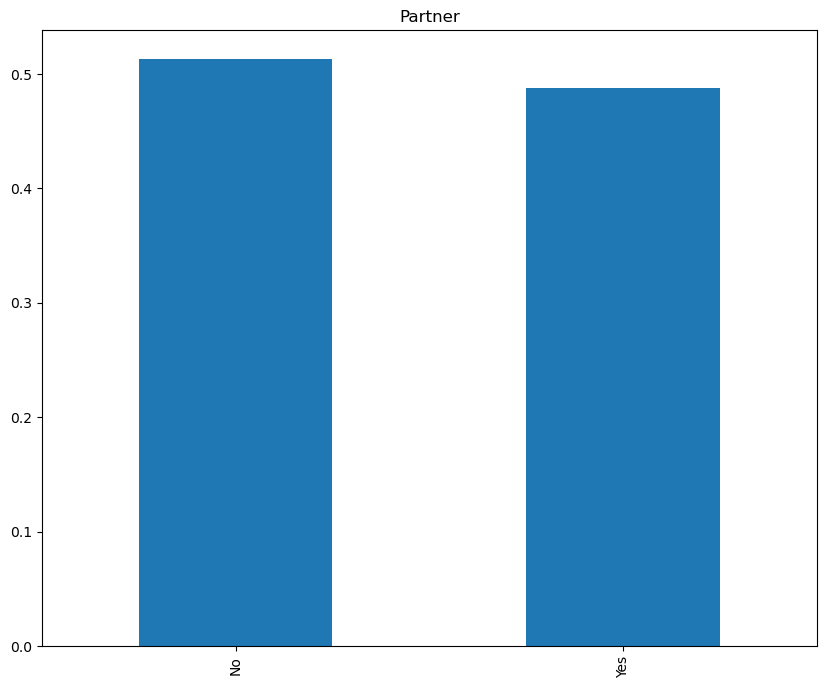

In [46]:
train_df['Partner'].value_counts(normalize = True).plot.bar(figsize = (10,8), title = 'Partner')

In [47]:
train_df['Dependents'].value_counts()

No     3482
Yes    1561
Name: Dependents, dtype: int64

In [48]:
train_df['Dependents'].value_counts(normalize = True)

No     0.690462
Yes    0.309538
Name: Dependents, dtype: float64

<AxesSubplot:title={'center':'Dependents'}>

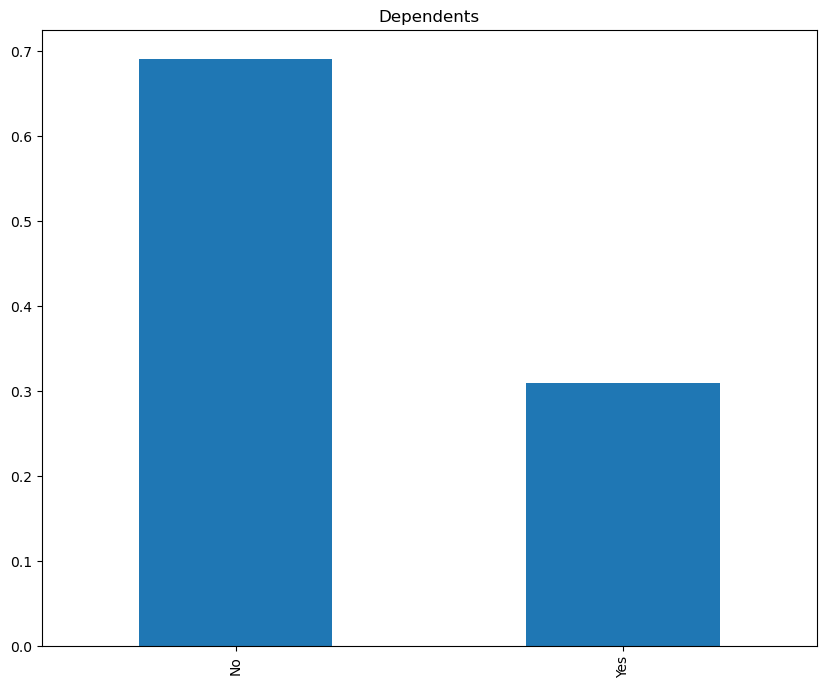

In [49]:
train_df['Dependents'].value_counts(normalize = True).plot.bar(figsize = (10,8), title = 'Dependents')

In the above graph, about 69% of the Dependants did not Churn while about 31% Churned


## BIVARIATE ANALYSIS

### Let us look at the relationship between the target variable and the Categorical variables. With the Bar Plot below, we can see the proportion of the Churned (Yes) and Not Churn (No).

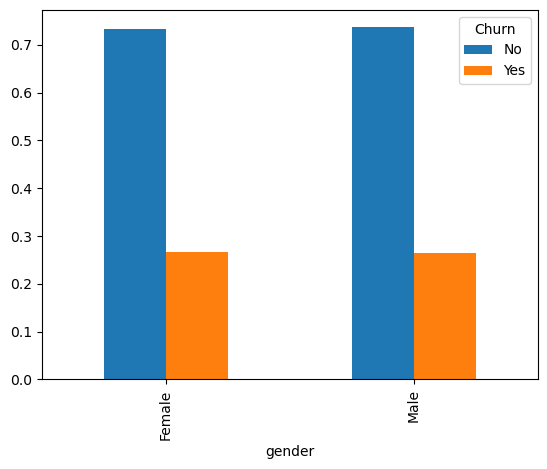

In [50]:
Gender = pd.crosstab(train_df['gender'],train_df['Churn'])

Gender.div(Gender.sum(1).astype(float), axis = 0).plot(kind='bar')

figsize = (4,4)

About 7

In [51]:
#(train['gender'],train['Churn']).value_counts()

train_df[['gender','Churn']].value_counts()

gender  Churn
Male    No       1883
Female  No       1823
Male    Yes       675
Female  Yes       661
dtype: int64

In [52]:
train_df[['gender','Churn']].value_counts(normalize = True)

gender  Churn
Male    No       0.373463
Female  No       0.361563
Male    Yes      0.133875
Female  Yes      0.131099
dtype: float64

<AxesSubplot:title={'center':'Churn Rate'}, xlabel='gender,Churn'>

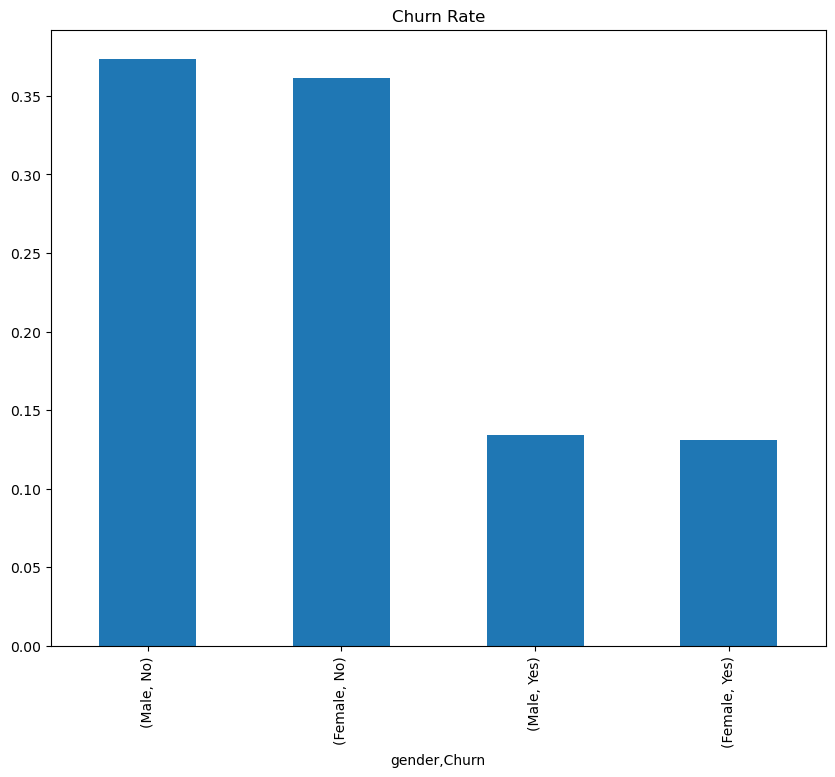

In [53]:
train_df[['gender','Churn']].value_counts(normalize = True).plot.bar(figsize = (10,8), title = 'Churn Rate')

37% of male and 36% of female did not churn while 13.38% Male and 13.10 Female Churned. The churn rate of both male and female are closely related as they are almost the same as well as their retention rate.

## MULTIVARIATE ANALYSIS

Now, lets look at how three or more variables are related in the train dataset.

We shall be looking at the Numerical Columns to see how much they relate to one another.

In [54]:
# lets split our dataset into numeric and categorical datas

num_col = train_df.select_dtypes(exclude='object')

cat_col = train_df.select_dtypes(include='object')


In [55]:
num_col

,tenure,MonthlyCharges,TotalCharges
0,1,29.850000,29.850000
1,34,56.950001,1889.500000
2,2,53.849998,108.150002
3,45,42.299999,1840.750000
4,2,70.699997,151.649994
...,...,...,...
5038,24,84.800000,1990.500000
5039,72,103.200000,7362.900000
5040,11,29.600000,346.450000
5041,4,74.400000,306.600000


In [56]:
cat_col

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,7590-VHVEG,Female,No,Yes,No,No,NaN,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,5575-GNVDE,Male,No,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,3668-QPYBK,Male,No,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,7795-CFOCW,Male,No,No,No,No,NaN,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,9237-HQITU,Female,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,6840-RESVB,Male,No,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
5039,2234-XADUH,Female,No,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
5040,4801-JZAZL,Female,No,Yes,Yes,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
5041,8361-LTMKD,Male,Yes,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


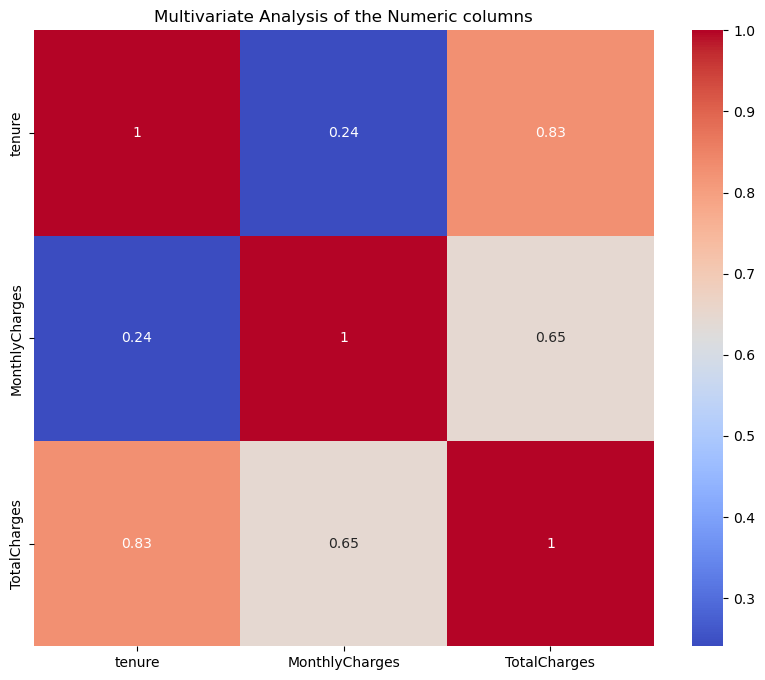

In [57]:
# Multivariate Analysis on the Numeric values

plt.figure(figsize=(10,8))
sns.heatmap(data = num_col.corr(), annot = True, cmap='coolwarm')
plt.title('Multivariate Analysis of the Numeric columns')
plt.show()

## FEATURE ENGINEERING

Feature engineering is the process of extracting features from the data and transforming them into a format that is suitable for the machine learning model. 

In this project, we need to transform both numerical and categorical variables. Most machine learning algorithms require numerical values; therefore, all categorical attributes available in the dataset should be encoded into numerical labels before training the model. In addition, we need to transform numeric columns into a common scale.

In [58]:
train_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,NaN,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,7795-CFOCW,Male,No,No,No,45,No,NaN,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,6840-RESVB,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.800000,1990.500000,No
5039,2234-XADUH,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.200000,7362.900000,No
5040,4801-JZAZL,Female,No,Yes,Yes,11,No,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.600000,346.450000,No
5041,8361-LTMKD,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.400000,306.600000,Yes


In [59]:
# Dropping the Customer ID which is not relevant to the project.

train_df = train_df.drop(columns='customerID', axis=1)

train_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,NaN,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,Male,No,No,No,45,No,NaN,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.800000,1990.500000,No
5039,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.200000,7362.900000,No
5040,Female,No,Yes,Yes,11,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.600000,346.450000,No
5041,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.400000,306.600000,Yes


In [60]:
train_df.isna().sum()

gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          8
Churn                 1
dtype: int64

In [61]:
# Filling the missing values with the mode of the features

train_df['Churn'].fillna(train_df['Churn'].mode()[0], inplace = True)

train_df['Churn'].fillna(train_df['Churn'].mode()[0], inplace = True)

train_df['TotalCharges'].fillna(train_df['TotalCharges'].mode()[0], inplace = True)

train_df['StreamingMovies'].fillna(train_df['StreamingMovies'].mode()[0], inplace = True)

train_df['StreamingTV'].fillna(train_df['StreamingTV'].mode()[0], inplace = True)

train_df['TechSupport'].fillna(train_df['TechSupport'].mode()[0], inplace = True)

train_df['DeviceProtection'].fillna(train_df['DeviceProtection'].mode()[0], inplace = True)

train_df['OnlineBackup'].fillna(train_df['OnlineBackup'].mode()[0], inplace = True)

#train_df['OnlineSecurity '].fillna(train_df['OnlineSecurity '].mode()[0], inplace = True)

train_df['MultipleLines'].fillna(train_df['MultipleLines'].mode()[0], inplace = True)

train_df = train_df.drop(columns='OnlineSecurity', axis=1)

In [62]:
train_df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [63]:
# select independent variables

x = train_df.drop(columns='Churn')


# select dependent variables

y = train_df.loc[:, 'Churn']

# prove that the variables were selected correctly

print(x.columns)

# prove that the variables were selected correctly

print(y.name)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges'],
      dtype='object')
Churn


In [64]:
x.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [65]:
x.isnull().any()

gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
dtype: bool

In [66]:

# Seperating the train dataset into numerical and categorical variables

num_cols = x.select_dtypes(exclude='object').columns

cat_cols = x.select_dtypes(include='object').columns

### X - INPUT (INDEPENDENT VARIABLES) AND Y - OUTPUT VARIBLES (DEPENDENT VARIABLE) CREATION

First, we create a variable X to store the input (independent) attributes of the dataset. Additionally, we create a variable y to store only the output variable (Churn).

In [67]:
# APPLYING TRAIN_TEST

x_train,x_eval,y_train,y_eval = train_test_split(x, y,test_size=0.10,random_state=11)

print('Shape of x_train and y_train: ',x_train.shape, y_train.shape)

print('Shape of x_eval and y_eval: ',x_eval.shape, y_eval.shape)

Shape of x_train and y_train:  (4538, 18) (4538,)
Shape of x_eval and y_eval:  (505, 18) (505,)


### NORMALIZING AND ENCODING OUR DATASET

In [68]:
# Applying OrdinalEnconder() for categorical binary variables and  StandardScaler() for numerical variables to scale it


cat_encoder = OrdinalEncoder()

num_scaler = StandardScaler()

# Apply SimpleImputer

num_imputer = SimpleImputer(strategy = 'median').set_output(transform = 'pandas')

cat_imputer = SimpleImputer(strategy = 'most_frequent').set_output(transform = 'pandas')


In [69]:
# Feature pipeline

num_pipe = Pipeline(steps = [('num_imputer', num_imputer), ('scaler', num_scaler)])

cat_pipe = Pipeline(steps = [('cat_imputer', cat_imputer), ('encoder', cat_encoder)])


In [70]:
# End2End_pipeline Features preprocessor 

preprocessor = ColumnTransformer([("StandardScaler", num_pipe, num_cols),
                                  ("OrdinalEncoder", cat_pipe, cat_cols),]) #preprocessor.set_output(transform='pandas')



In [71]:
preprocessor.fit(x_train)

ColumnTransformer(transformers=[('StandardScaler',
                                 Pipeline(steps=[('num_imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                ('OrdinalEncoder',
                                 Pipeline(steps=[('cat_imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OrdinalEncoder())]),
                                 Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])

In [72]:
preprocessor.transform(x_train)

array([[-1.04773785, -1.17564112, -0.9182947 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.60062954,  0.69670031,  1.76158368, ...,  2.        ,
         0.        ,  1.        ],
       [ 1.55988543,  1.53550911,  2.49853704, ...,  2.        ,
         1.        ,  2.        ],
       ...,
       [ 0.74500316, -1.51515899, -0.58933931, ...,  2.        ,
         0.        ,  1.        ],
       [ 1.03021195,  0.57853467,  1.10952633, ...,  2.        ,
         0.        ,  0.        ],
       [ 1.55988543, -1.48520153, -0.35474215, ...,  2.        ,
         0.        ,  0.        ]])

In [73]:
# end2end Pipeline

clf_ = Pipeline([('preprocessor',preprocessor), ('model', None)]).set_output(transform = 'pandas')

clf_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('StandardScaler',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('OrdinalEncoder',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder())]),
                                                  Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('model', None)])

### MODEL TRAINING USING THE .FIT METHOD

In [74]:
clf_.fit(x_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('StandardScaler',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('OrdinalEncoder',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder())]),
                                                  Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('model', None)])

## WE SHALL BE TRAINING OF THE FOLLOWING MODELS:

### 1) Logistic Regression.

### 2) Decision Trees.

### 3) Support Vector Machine.

### 4) Random Forest

### 5) KNeighborsClassifier

## LOGISTIC REGRESSION MODEL

In [75]:
clf_ = Pipeline([('preprocessor',preprocessor), ('model', LogisticRegression())]).set_output(transform = 'pandas')

clf_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('StandardScaler',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('OrdinalEncoder',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder())]),
                                                  Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('model', LogisticRegression())])

In [76]:
model_lr = clf_.fit(x_train, y_train)

model_lr

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('StandardScaler',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('OrdinalEncoder',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder())]),
                                                  Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('model', LogisticRegression())])

In [77]:
model_lr.score(x_eval, y_eval)

0.7900990099009901

In [78]:
# PREDICTION

lr_eval_predict = model_lr.predict(x_eval)

In [79]:
lr_eval_predict

array(['Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No',
       'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No',
       'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No',
       'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Yes',
       'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes',
       'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No',
       'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No',
       'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes', '

In [80]:
print(classification_report(y_eval, lr_eval_predict))

              precision    recall  f1-score   support

          No       0.83      0.89      0.86       368
         Yes       0.64      0.51      0.57       137

    accuracy                           0.79       505
   macro avg       0.74      0.70      0.72       505
weighted avg       0.78      0.79      0.78       505



## DECISION TREE MODEL

In [81]:
dt_model = Pipeline([('preprocessor',preprocessor), ('model', DecisionTreeClassifier())]).set_output(transform = 'pandas')

In [82]:
dt_model.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('StandardScaler',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('OrdinalEncoder',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder())]),
                                                  Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('model', DecisionTreeClassifier())])

In [83]:
dt_model.score(x_eval, y_eval)

0.7524752475247525

In [84]:
dt_eval_predict = dt_model.predict(x_eval)

In [85]:
dt_eval_predict

array(['No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes',
       'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes',
       'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No',
       'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'Yes',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'No',
       'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No',
       'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No',
       'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No',
       'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No',
  

In [86]:
print(classification_report(y_eval, dt_eval_predict))

              precision    recall  f1-score   support

          No       0.83      0.83      0.83       368
         Yes       0.54      0.55      0.55       137

    accuracy                           0.75       505
   macro avg       0.69      0.69      0.69       505
weighted avg       0.75      0.75      0.75       505



## SUPPORT VECTOR MACHINE MODEL

In [87]:
svm = Pipeline([('preprocessor',preprocessor), ('model', SVC())]).set_output(transform = 'pandas')

In [88]:
svm.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('StandardScaler',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('OrdinalEncoder',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder())]),
                                                  Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('model', SVC())])

In [89]:
svm.score(x_eval, y_eval)

0.7821782178217822

In [90]:
svm_eval_predict = svm.predict(x_eval)

In [91]:
svm_eval_predict

array(['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No',
       'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No',
       'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No',
       'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No',
       'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes',
       'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No',
       'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'N

In [92]:
print(classification_report(y_eval, svm_eval_predict))

              precision    recall  f1-score   support

          No       0.81      0.92      0.86       368
         Yes       0.66      0.42      0.51       137

    accuracy                           0.78       505
   macro avg       0.73      0.67      0.68       505
weighted avg       0.77      0.78      0.76       505



## RANDOM FOREST CLASSIFIER MODEL

In [93]:
rf = Pipeline([('preprocessor',preprocessor), ('model', RandomForestClassifier())]).set_output(transform = 'pandas')

In [94]:
rf_model = rf.fit(x_train, y_train)

rf_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('StandardScaler',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('OrdinalEncoder',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder())]),
                                                  Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('model', RandomForestClassifier())])

In [95]:
rf.score(x_eval, y_eval)



0.7742574257425743

In [96]:
rf_eval_predict = rf.predict(x_eval)

In [97]:
print(classification_report(y_eval,rf_eval_predict))

              precision    recall  f1-score   support

          No       0.81      0.89      0.85       368
         Yes       0.61      0.45      0.52       137

    accuracy                           0.77       505
   macro avg       0.71      0.67      0.69       505
weighted avg       0.76      0.77      0.76       505



## KNEIGHBORSCLASSIFIER MODEL

In [98]:
knn = Pipeline([('preprocessor',preprocessor), ('model', KNeighborsClassifier())]).set_output(transform = 'pandas')

In [99]:
knn.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('StandardScaler',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('OrdinalEncoder',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder())]),
                                                  Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('model', KNeighborsClassifier())])

In [100]:
knn.score(x_eval, y_eval)

0.7584158415841584

In [101]:
# Evaluate the model on the evaluation dataset (Evalset)

knn_eval_predict = knn.predict(x_eval)

In [102]:
print(classification_report(y_eval, knn_eval_predict))

              precision    recall  f1-score   support

          No       0.83      0.85      0.84       368
         Yes       0.56      0.52      0.54       137

    accuracy                           0.76       505
   macro avg       0.69      0.68      0.69       505
weighted avg       0.75      0.76      0.76       505



In [104]:

from imblearn.over_sampling import SMOTE

over_sampler = SMOTE(k_neighbors=2)

X_res, y_res = over_sampler.fit_resample(x_train, y_train)

print(f"Training target statistics: {Counter(y_res)}")

print(f"Testing target statistics: {Counter(y_test)}")

ValueError: could not convert string to float: 'Male'